# Competition — Network Generation

### Challenge Overview

Your goal is to generate a network that is as close as possible to the original real network. You do not have the original network in the explicit view, but you know some of its statistics. All statistics are in `stats.txt` file that contains a dictionary of the form
* number_nodes (number of nodes): value
* number_cc (number of connected components): value, sigma
* radius (radius of giant component): value, sigma
* diameter (diameter of giant component): value, sigma
* average_clustering (average clustering coefficient): value, sigma
* average_path_length (average path length): value, sigma
* degree_cdf (empirical CDF of degree distribution): values, probabilities

Meaning of all these sigmas is described in Evaluation section. 

You can use this code to draw CDF
```python
q_seq, p_seq = stats['degree_cdf']
    plt.plot(
        np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
        np.repeat(p_seq, 2)
    )
    plt.show()
```

### Evaluation Criteria

Your total score is calculated as weighted sum of 6 scores — similarities between statistics of original and generated networks. Each score takes values from the interval [0, 1], where 1 — absolute similarity with the original network. The scores are
* "KS"
    * 1 - KS_dist
    * where KS_dist is Kolmogorov-Smirnov test statistic value
* "Radius"
    * $\text{GK}(r, r', \sigma_r) = \exp\left[-\frac{(r - r')^2}{2\sigma_r^2}\right]$
    * where GK is Gaussian Kernel, $r$ is a radius of the original network, $r'$ is a radius of a generated network, $\sigma_r$ is a sigma of a radius from `stats.txt` file
* "Diameter", "Av. clustering", "Av. path length", "Number of CC" are calculated by Gaussian Kernel in the same way
* "Total"
    * 1/6 KS + 1/6 Radius + 1/6 Diameter + 1/6 Av. clustering + 1/6 Av. path length + 1/6 Number of CC

All scores immediately take value 0 if a generated network has incorrect number of nodes. All scores are multiplied by 100 on the leaderboard.

**Baselines**

Baselines are calculated by the following algorithm:
1. Generate a random degree sequence using Inverse Transform Sampling
2. Generate a valid graph by Configuration Model
3. Calculate total score
4. Repeat 1-3 steps 1000 times and accumulate a set of total scores

* Baseline for grade 4: beat a mean total score
* Baseline for grade 6: beat a mean + 3*sigma total score

Calculated baselines are in the leaderboard.

### Submission Guidelines

Submit a txt file with a list of edges without self-loops and parallels. The correct form is
```
1 2
1 3
3 2
```
and so on.

In [1]:
import networkx as nx

In [2]:
!wget https://raw.githubusercontent.com/network-science-course/network-science-course/main/competition_network_generation/stats.txt stats.json

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
import json
with open('stats.txt', 'r') as file:
    data = json.load(file)
    for key in data:
        print(key, data[key])

number_nodes 1882
radius [15, 2]
diameter [28, 4]
average_clustering [0.005066798238955518, 0.001]
average_path_length [11.748410823170731, 2]
number_cc [168, 32]
degree_cdf [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 46], [0.0, 0.6902231668437833, 0.8517534537725824, 0.9086078639744952, 0.9378320935175345, 0.9516471838469713, 0.9654622741764081, 0.9723698193411264, 0.9776833156216791, 0.9808714133900106, 0.9845908607863975, 0.9888416578108395, 0.9893730074388948, 0.9925611052072264, 0.9936238044633369, 0.9952178533475027, 0.9957492029755579, 0.9968119022316685, 0.997874601487779, 0.9989373007438895, 0.9994686503719448, 1.0]]


In [4]:
def generate_graph(data):
    G = nx.Graph()
    nodes = np.arange(data['number_nodes'])
    G.add_nodes_from(nodes)
    return G

In [5]:
g = nx.barabasi_albert_graph(1882, 2)
print(g)
for x in list(g.edges()):
  print(f"{x[0]} {x[1]}\n")

Graph with 1882 nodes and 3760 edges
0 1

0 2

0 4

0 5

0 8

0 14

0 24

0 25

0 36

0 45

0 52

0 80

0 99

0 117

0 122

0 127

0 128

0 150

0 164

0 177

0 199

0 208

0 220

0 229

0 285

0 306

0 308

0 312

0 375

0 388

0 420

0 424

0 437

0 439

0 442

0 476

0 504

0 510

0 513

0 520

0 540

0 579

0 590

0 646

0 655

0 663

0 693

0 707

0 718

0 762

0 801

0 805

0 824

0 830

0 856

0 900

0 990

0 1005

0 1132

0 1177

0 1258

0 1268

0 1297

0 1301

0 1307

0 1399

0 1439

0 1551

0 1634

0 1734

0 1843

0 1874

1 3

1 4

1 6

1 8

1 10

1 12

1 29

1 39

1 40

1 48

1 57

1 63

1 66

1 85

1 124

1 134

1 190

1 225

1 234

1 237

1 244

1 246

1 271

1 275

1 281

1 284

1 289

1 291

1 356

1 416

1 434

1 439

1 556

1 626

1 692

1 722

1 765

1 784

1 823

1 833

1 893

1 1060

1 1153

1 1160

1 1205

1 1230

1 1356

1 1406

1 1413

1 1511

1 1561

1 1574

1 1596

1 1619

1 1737

1 1794

1 1807

1 1866

2 3

2 6

2 17

2 22

2 32

2 38

2 71

2 162

2 168

2 1


726 1477

726 1795

726 1840

728 843

728 1217

728 1642

730 803

730 959

731 1026

732 1007

733 1419

733 1521

738 973

738 1238

738 1524

738 1747

739 1627

741 1554

742 951

742 1167

742 1718

743 1079

743 1661

744 912

744 941

744 1174

748 844

749 987

750 1032

751 817

751 1433

752 1810

753 1871

756 940

756 1363

758 846

758 869

758 1047

759 1202

760 828

760 998

760 1050

761 1150

763 1076

763 1602

765 1197

767 895

767 911

767 1027

768 1582

770 911

773 806

773 1430

774 1337

774 1368

777 1735

778 1758

780 836

781 920

781 1080

781 1184

782 950

782 1144

783 836

783 1090

783 1450

783 1754

784 977

784 1044

784 1119

784 1396

786 863

786 1516

786 1578

787 894

787 922

788 1222

789 1069

791 1287

794 1049

794 1430

794 1808

795 852

795 959

795 1263

795 1295

799 1704

799 1842

802 1313

802 1331

802 1427

803 904

804 814

804 916

804 1254

805 1151

805 1328

805 1568

806 1583

807 953

807 1593

812 1265

815 947

815

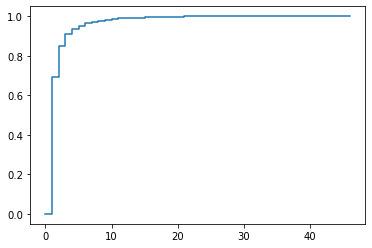

In [6]:
import matplotlib.pyplot as plt
import numpy as np
q_seq, p_seq = data['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.show()

# походу повер ло

In [7]:
import networkx as nx
g = generate_graph(data)

In [8]:
import pandas as pd
df = pd.DataFrame(data).T
df.columns = ['value', 'sigma']
df

,value,sigma
number_nodes,1882,1882
radius,15,2
diameter,28,4
average_clustering,0.005067,0.001
average_path_length,11.748411,2.0
number_cc,168,32
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ..."


In [9]:
from tqdm.notebook import tqdm
def middleRes(graph_list, df):
    for G in tqdm(graph_list):
        res = {}
        res['number_nodes'] = nx.number_of_nodes(G)
        res['number_cc'] = len(list(nx.connected_components(G)))
        largest_cc = G.subgraph(max(nx.connected_components(G), key=len))
        res['radius'] = nx.radius(largest_cc)
        res['diameter'] = nx.diameter(largest_cc)
        res['average_path_length'] = nx.average_shortest_path_length(largest_cc)
        res['average_clustering'] = nx.average_clustering(G)
        distr = pd.Series([x[1] for x in G.degree]).value_counts().sort_index()
        distr = distr.cumsum() / distr.sum()
        res['degree_cdf'] = distr
        res = pd.Series(res)
        df = pd.concat([df, res], axis = 1)
    return df

In [10]:
## проверим граф барабаши алберта
g1 = nx.barabasi_albert_graph(data['number_nodes'], 1)
g2 = nx.barabasi_albert_graph(data['number_nodes'], 2)
g3 = nx.barabasi_albert_graph(data['number_nodes'], 3)
g4 = nx.barabasi_albert_graph(data['number_nodes'], 4)
middleRes([g1, g2, g3, g4], df)

  0%|          | 0/4 [00:00<?, ?it/s]

,value,sigma,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882
radius,15,2,9,4,4,4
diameter,28,4,18,8,6,5
average_clustering,0.005067,0.001,0.0,0.016915,0.021366,0.023206
average_path_length,11.748411,2.0,7.926758,4.353427,3.668813,3.378097
number_cc,168,32,1,1,1,1
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.666844 2 0.826780 3 0.897981 4...,2 0.496812 3 0.689160 4 0.80818...,3 0.400106 4 0.603082 5 0.71679...,4 0.332094 5 0.518066 6 0.64027...


In [11]:
len(list(nx.connected_components(g)))

1882

In [12]:
data['number_nodes']

1882

In [13]:
#g = nx.barabasi_albert_graph(data['number_nodes'], 1)
g = nx.barabasi_albert_graph(1882, 1)
distr = pd.Series([x[1] for x in g.degree]).value_counts().sort_index()
distr = distr.cumsum() / distr.sum() 
distr

1      0.670032
2      0.835813
3      0.901169
4      0.936238
5      0.955367
6      0.964400
7      0.973964
8      0.980340
9      0.981934
10     0.984060
11     0.985654
12     0.988842
13     0.990436
14     0.992030
15     0.993624
16     0.994155
17     0.995218
18     0.995749
19     0.996812
22     0.997343
27     0.997875
28     0.998406
37     0.998937
92     0.999469
130    1.000000
dtype: float64

In [14]:
with open('balabal.txt', 'w') as f:
    for x in list(g.edges()):
      print(f"{x[0]} {x[1]}\n")
      f.write(f"{x[0]} {x[1]}\n")

0 1

0 2

0 4

0 18

0 43

0 137

0 183

0 192

0 263

0 312

0 350

0 399

0 528

0 1111

0 1202

0 1422

0 1614

0 1623

0 1694

1 3

1 5

1 8

1 11

1 24

1 39

1 57

1 59

1 62

1 69

1 79

1 85

1 105

1 114

1 115

1 126

1 136

1 201

1 230

1 245

1 269

1 279

1 292

1 294

1 309

1 323

1 333

1 337

1 343

1 345

1 369

1 383

1 391

1 413

1 427

1 431

1 532

1 535

1 539

1 585

1 743

1 799

1 875

1 948

1 1049

1 1177

1 1224

1 1234

1 1302

1 1313

1 1505

1 1658

1 1693

1 1750

2 12

2 973

3 14

3 19

3 28

3 42

3 54

3 61

3 80

3 87

3 92

3 95

3 96

3 142

3 161

3 168

3 170

3 171

3 209

3 255

3 303

3 305

3 318

3 326

3 349

3 355

3 356

3 367

3 371

3 430

3 448

3 456

3 459

3 475

3 497

3 647

3 655

3 663

3 680

3 702

3 708

3 747

3 782

3 826

3 851

3 861

3 892

3 966

3 1005

3 1013

3 1032

3 1113

3 1182

3 1293

3 1320

3 1374

3 1456

3 1527

3 1583

3 1599

3 1743

4 9

4 97

4 275

4 441

4 446

4 822

4 980

4 993

4 1262

4 1426


In [15]:
import random

def random_barabasi(z):
    g = nx.Graph()
    n = 1882
    sizes = []
    m = data['number_cc'][0]
    for i in range(m - 1):
        k = random.randint(2, n - 2 * (m - i) - 1)
        sizes.append(k)
        n -= k

    sizes.append(n)


    for i in sizes: 
        n = nx.number_of_nodes(g)
        G = nx.barabasi_albert_graph(i, min(i-1, z))
        labels = {
            k:  n + k for k in range(i)
        }
        G = nx.relabel_nodes(G, labels)
        g = nx.union(G, g)
    return g

In [16]:
middleRes([g1, random_barabasi(1), random_barabasi(2)], df)

  0%|          | 0/3 [00:00<?, ?it/s]

,value,sigma,0,0,0
number_nodes,1882,1882,1882,1882,1882
radius,15,2,8,9,4
diameter,28,4,16,18,8
average_clustering,0.005067,0.001,0.0,0.0,0.019873
average_path_length,11.748411,2.0,7.007499,7.320053,4.350509
number_cc,168,32,1,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.665781 2 0.823592 3 0.89479...,1 0.721041 2 0.860255 3 0.915515 4...,1 0.172689 2 0.583422 3 0.745484 4...


In [17]:
with open('test_graph_2.txt', 'w') as f:
    for x in list(random_barabasi(1).edges()):
        #print(f"{x[0]} {x[1]}\n")
        f.write(f"{x[0]} {x[1]}\n")

In [18]:
g = random_barabasi(2)

In [19]:
def bar_rem(k, l):
    g = random_barabasi(k)
    for i in range(l):
        E = list(g.edges)
        e = random.choice(E)
        if (g.degree(e[0]) > 1) and (g.degree(e[1]) > 1):
            g.remove_edge(e[0], e[1])
            if len(list(nx.connected_components(g))) > 168:
                g.add_edge(e[0], e[1])
    return g

def bar_add(k, l):
    g = random_barabasi(k)
    for i in range(l):
        e = random.choice
        E = list(g.edges)
        e = random.choice(E)
        if (g.degree(e[0]) > 1) and (g.degree(e[1]) > 1):
            g.remove_edge(e[0], e[1])
            if len(list(nx.connected_components(g))) > 168:
                g.add_edge(e[0], e[1])
    return g

In [20]:
middleRes([random_barabasi(1), bar_rem(2, 3000), bar_rem(3, 4000), bar_rem(3, 4500), bar_rem(3, 5000)], df)

  0%|          | 0/5 [00:00<?, ?it/s]

,value,sigma,0,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882,1882
radius,15,2,8,20,9,11,18
diameter,28,4,15,39,18,20,36
average_clustering,0.005067,0.001,0.0,0.000457,0.003457,0.000578,0.0
average_path_length,11.748411,2.0,6.856469,11.810585,7.360475,7.863599,14.795803
number_cc,168,32,168,168,168,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.713071 2 0.865569 3 0.917641 4...,1 0.613177 2 0.836876 3 0.920298 4...,1 0.581828 2 0.818278 3 0.898512 4...,1 0.606801 2 0.834750 3 0.917641 4...,1 0.591392 2 0.829437 3 0.916578 4...


In [21]:
g0, g1, g2, g3 = bar_rem(2, 3001), bar_rem(2, 3101), bar_rem(2, 3251), bar_rem(2, 3401)
#middleRes([g0, g1, g2, g3], df)

In [22]:
g0 = bar_rem(2, 2805)

In [23]:
data['average_clustering']

[0.005066798238955518, 0.001]

In [24]:
initcl = abs(nx.average_clustering(g0)-data['average_clustering'][0])



largest_cc1 = g0.subgraph(max(nx.connected_components(g0), key=len))
initrad = nx.radius(largest_cc1)
initdim =  nx.diameter(largest_cc1)
initap = nx.average_shortest_path_length(largest_cc1)


raddif = abs(initrad-data['radius'][0])
dimdif = abs(initdim-data['diameter'][0])
dimap = abs(initap-data['average_path_length'][0])

for x in range(100000):
    ccc = random.choice([2 ])
    #print(x)
    if ccc==1:
      print("add")
      E = list(g0.nodes)
      e1 = random.choice(E)
      e2 = random.choice(E)
      

      while g0.has_edge(e1, e2):
        e1 = random.choice(E)
        e2 = random.choice(E)

      if not (g0.has_edge(e1, e2)):
        g0.add_edge(e1, e2)
          #print(abs(nx.average_clustering(g0)-data['average_clustering'][0]))
        largest_cc1 = g0.subgraph(max(nx.connected_components(g0), key=len))
        if len(list(nx.connected_components(g0))) != 168 or abs(nx.average_clustering(g0)-data['average_clustering'][0])>initcl or abs(nx.radius(largest_cc1)-data['radius'][0])>raddif or abs(nx.diameter(largest_cc1)-data['diameter'][0])>dimdif or abs(nx.average_shortest_path_length(largest_cc1)-data['average_path_length'][0])>dimap:
            g0.remove_edge(e1, e2)
            print("lose")
        else:
            #print("!!!!!!!!!!!!!!!!!")
            #print(abs(nx.average_clustering(g0)-data['average_clustering'][0]))
            #print(nx.average_clustering(g0))
            print("win")
            print(e1, e2)

            initcl = abs(nx.average_clustering(g0)-data['average_clustering'][0])
            print(initcl)
            largest_cc1 = g0.subgraph(max(nx.connected_components(g0), key=len))
            initrad = nx.radius(largest_cc1)
            initdim =  nx.diameter(largest_cc1)
            initap = nx.average_shortest_path_length(largest_cc1)
            raddif = abs(initrad-data['radius'][0])
            dimdif = abs(initdim-data['diameter'][0])
            dimap = abs(initap-data['average_path_length'][0])
            print(dimap)
    else:
      E = list(g0.edges)
      e = random.choice(E)
      #print("delete")
      if (g0.has_edge(e[0],e[1])):
        g0.remove_edge(e[0], e[1])
          #print(abs(nx.average_clustering(g0)-data['average_clustering'][0]))
        largest_cc1 = g0.subgraph(max(nx.connected_components(g0), key=len))
        if len(list(nx.connected_components(g0))) != 168 or abs(nx.average_clustering(g0)-data['average_clustering'][0])>initcl or abs(nx.radius(largest_cc1)-data['radius'][0])>raddif or abs(nx.diameter(largest_cc1)-data['diameter'][0])>dimdif or abs(nx.average_shortest_path_length(largest_cc1)-data['average_path_length'][0])>dimap:
            g0.add_edge(e[0], e[1])
            #print("lose")
        else:
            #print("!!!!!!!!!!!!!!!!!")
            #print(abs(nx.average_clustering(g0)-data['average_clustering'][0]))
            #print(nx.average_clustering(g0))
            print("win")
            print(e[0], e[1])

            initcl = abs(nx.average_clustering(g0)-data['average_clustering'][0])
            
            largest_cc1 = g0.subgraph(max(nx.connected_components(g0), key=len))
            initrad = nx.radius(largest_cc1)
            initdim =  nx.diameter(largest_cc1)
            initap = nx.average_shortest_path_length(largest_cc1)
            raddif = abs(initrad-data['radius'][0])
            dimdif = abs(initdim-data['diameter'][0])
            dimap = abs(initap-data['average_path_length'][0])
            print(dimap)
        

win
3 139
2.9518106202178345
win
4 52
2.9270698555827117
win
3 30
2.7957183371321435
win
8 569
2.7855135697551408
win
4 62
2.762909858808454
win
61 596
2.5874799279602847
win
130 151
2.541963372514495
win
0 75
2.511291947879238
win
1056 1067
2.511291947879238
win
20 68
2.507972122338087
win
1274 1303
2.507972122338087
win
0 40
2.0749196973197748
win
772 784
2.0749196973197748
win
0 4
1.9784465079351516
win
4 133
1.7674594982646479
win
3 44
1.5930846536714611
win
3 391
1.549826117217222
win
5 311
1.5406394744748049
win
799 826
1.5406394744748049
win
59 65
1.538492340344444
win
7 613
1.5145412103269038
win
3 436
1.4893300250685417
win
1320 1346
1.4893300250685417
win
8 57
1.4440587603762989
win
53 208
1.3224247879429463
win
1277 1299
1.3224247879429463
win
1321 1323
1.3224247879429463
win
1274 1286
1.3224247879429463
win
1295 1303
1.3224247879429463


In [25]:
nx.average_clustering(g0)

0.0004299209665840909

In [26]:
nx.average_clustering(g0)

0.0004299209665840909

In [27]:
len(list(nx.connected_components(g0)))

168

In [28]:
qq=g0.subgraph(max(nx.connected_components(g0), key=len))
nx.radius(qq)


15

In [29]:
nx.diameter(qq)

29

In [30]:
abs(nx.average_clustering(g0)-data['average_clustering'][0])

0.004636877272371427

In [31]:
middleRes([g0], df)

  0%|          | 0/1 [00:00<?, ?it/s]

,value,sigma,0
number_nodes,1882,1882,1882
radius,15,2,15
diameter,28,4,29
average_clustering,0.005067,0.001,0.00043
average_path_length,11.748411,2.0,10.425986
number_cc,168,32,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.630181 2 0.845377 3 0.912327 4...


In [32]:
middleRes([g0], df)

  0%|          | 0/1 [00:00<?, ?it/s]

,value,sigma,0
number_nodes,1882,1882,1882
radius,15,2,15
diameter,28,4,29
average_clustering,0.005067,0.001,0.00043
average_path_length,11.748411,2.0,10.425986
number_cc,168,32,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.630181 2 0.845377 3 0.912327 4...


In [33]:
random.choice([1,2])

2

In [34]:
with open('submit2.txt', 'w') as f:
    for x in list(g0.edges()):
      #print(f"{x[0]} {x[1]}\n")
      f.write(f"{x[0]} {x[1]}\n")

In [35]:
g0, g1, g2, g3,g4, g5, g6, g7,g8, g9 = bar_rem(2, 2500), bar_rem(2, 2550), bar_rem(2, 2600), bar_rem(2, 2700), bar_rem(2, 2800), bar_rem(2, 2900), bar_rem(2, 300), bar_rem(2, 3100), bar_rem(2, 3250), bar_rem(2, 3400)
middleRes([g0, g1, g2, g3,g4, g5, g6, g7,g8, g9], df)

  0%|          | 0/10 [00:00<?, ?it/s]

,value,sigma,0,0,0,0,0,0,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882
radius,15,2,12,13,12,14,12,15,5,15,26,17
diameter,28,4,24,24,23,26,23,30,10,30,52,33
average_clustering,0.005067,0.001,0.000719,0.000661,0.000755,0.002634,0.002187,0.000655,0.037162,0.001381,0.000012,0.0
average_path_length,11.748411,2.0,8.404673,9.633989,8.112824,9.20086,9.214556,10.937561,4.236204,11.270501,17.138838,11.857856
number_cc,168,32,168,168,168,168,168,168,168,168,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.614772 2 0.844315 3 0.916047 4...,1 0.617428 2 0.834219 3 0.903826 4...,1 0.636026 2 0.841658 3 0.912327 4...,1 0.616897 2 0.834219 3 0.915515 4...,1 0.622742 2 0.837938 3 0.912859 4...,1 0.623273 2 0.835813 3 0.914984 4...,1 0.252391 2 0.624336 3 0.77789...,1 0.632837 2 0.840064 3 0.914984 4...,1 0.624867 2 0.834750 3 0.918704 4...,1 0.631775 2 0.840064 3 0.914984 4...


In [41]:
print(5)

5


In [42]:
with open('submit3.txt', 'w') as f:
    for x in list(g5.edges()):
      #print(f"{x[0]} {x[1]}\n")
      f.write(f"{x[0]} {x[1]}\n")

In [43]:
gg = []
tmp = 2890
for x in range(50):
  tmp += 2
  gg.append(bar_rem(2, tmp))


In [44]:
middleRes(gg, df)

  0%|          | 0/50 [00:00<?, ?it/s]

,value,sigma,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,...,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882
radius,15,2,14,14,18,16,16,16,22,15,...,15,16,13,16,16,13,14,15,22,18
diameter,28,4,27,25,36,32,32,28,43,29,...,28,32,25,31,32,25,26,29,43,36
average_clustering,0.005067,0.001,0.001251,0.00028,0.000641,0.00426,0.000298,0.000637,0.001531,0.000918,...,0.0,0.000288,0.000018,0.001972,0.000943,0.003131,0.00136,0.001275,0.0,0.000045
average_path_length,11.748411,2.0,10.197946,10.387148,13.034544,11.08626,11.769242,9.973259,14.455501,9.854026,...,10.466602,11.555975,9.401645,10.164227,10.668865,9.726622,9.145849,9.837906,15.15198,12.513352
number_cc,168,32,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.632837 2 0.829437 3 0.914984 4...,1 0.610521 2 0.845909 3 0.913390 4...,1 0.613709 2 0.843783 3 0.912859 4...,1 0.614772 2 0.833688 3 0.915515 4...,1 0.624867 2 0.834750 3 0.914453 4...,1 0.621679 2 0.842721 3 0.917109 4...,1 0.631243 2 0.834219 3 0.916047 4...,1 0.625399 2 0.837938 3 0.911796 4...,...,1 0.608927 2 0.848034 3 0.920829 4...,1 0.639745 2 0.844315 3 0.918704 4...,1 0.639745 2 0.837407 3 0.912859 4...,1 0.614240 2 0.842721 3 0.920298 4...,1 0.640808 2 0.855473 3 0.918704 4...,1 0.626461 2 0.840595 3 0.916578 4...,1 0.620085 2 0.840064 3 0.911796 4...,1 0.630712 2 0.840064 3 0.913390 4...,1 0.615303 2 0.850159 3 0.911265 4...,1 0.627524 2 0.837407 3 0.914984 4...


In [45]:
with open('submit4.txt', 'w') as f:
    for x in list(gg[13].edges()):
      #print(f"{x[0]} {x[1]}\n")
      f.write(f"{x[0]} {x[1]}\n")